# Simulation of Quantum Teleportation

>Quantum teleportation is a process in which quantum information (e.g. the exact state of an atom or photon) can be transmitted (exactly, in principle) from one location to another, with the help of classical communication and previously shared quantum entanglement between the sending and receiving location. 

(from[ Wikipedia](https://en.wikipedia.org/wiki/Quantum_teleportation))


Quantum teleportation is a fundamental quantum algorithm used for quantum communication.

Let's try to simulate quantum teleportation between two people.

### Simulate teleportation circuit and visualize.

#### 0. Qubit preparation
First, let's start the simplest one. (sending just one qubit information from Alice to Bob)  
Alice: Two qubit  
Bob: One qubits
$$|\psi_0\rangle = |000\rangle = |00\rangle_{alice}|0\rangle_{bob}$$

In [46]:
from qiskit import (QuantumCircuit,
                        QuantumRegister,
                        ClassicalRegister,
                        execute,
                        Aer)

from qiskit.visualization import plot_histogram

cr = ClassicalRegister(3)
# Alice gets 0, 1
# Bob gets 2
qc = QuantumCircuit(QuantumRegister(3), cr)

#### 1. Bell pair creation before sharing information.
Create bell pair between Alice's second qubit and Bob's qubit.
$$|\psi_1\rangle=|0\rangle\bigg(\frac{|00\rangle+|11\rangle}{\sqrt{2}}\bigg)$$

In [47]:
qc.h(1)
qc.cx(1, 2)

#### 2.  State preparation
Alice have to prepare a quantum state.  Apply an operation to Alice's first qubit.
$$|\psi_2\rangle=(\alpha|0\rangle + \beta|1\rangle)\bigg(\frac{|00\rangle+|11\rangle}{\sqrt{2}}\bigg) = \frac{1}{\sqrt{2}}(\alpha|000\rangle + \alpha|011\rangle+\beta|100\rangle + \beta|111\rangle)$$

In [48]:
qc.h(0)
qc.draw()

┌───┐     
q3_0: ┤ H ├─────
      ├───┤     
q3_1: ┤ H ├──■──
      └───┘┌─┴─┐
q3_2: ─────┤ X ├
           └───┘
c4_0: ══════════
                
c4_1: ══════════
                
c4_2: ══════════

#### 3. Apply CX and H
Applying CX gate from Alice's first qubit and second qubit.
$$|\psi_3\rangle = CX^{0, 1}|\psi_2\rangle  = \frac{1}{\sqrt{2}}(\alpha|000\rangle + \alpha|011\rangle+\beta|110\rangle+\beta|101\rangle)$$
And then, apply H gate to first qubit .
$$|\psi_3'\rangle = H^0|\psi_3\rangle  = \frac{1}{\sqrt{2}}(\alpha|+\rangle(|00\rangle +|11\rangle)+\beta|-\rangle(|10\rangle+|01\rangle))$$

In [49]:
qc.cx(0, 1)
qc.h(0)
qc.draw()

┌───┐          ┌───┐
q3_0: ┤ H ├───────■──┤ H ├
      ├───┤     ┌─┴─┐└───┘
q3_1: ┤ H ├──■──┤ X ├─────
      └───┘┌─┴─┐└───┘     
q3_2: ─────┤ X ├──────────
           └───┘          
c4_0: ════════════════════
                          
c4_1: ════════════════════
                          
c4_2: ════════════════════

#### 4. Measure first and second qubit.
Before the measurement, the quantum state is,
$$|\psi_4\rangle = \frac{1}{2}\big(|00\rangle(\alpha|0\rangle+\beta|1\rangle) + |01\rangle(\alpha|1\rangle+\beta|0\rangle) + 
|10\rangle(\alpha|0\rangle-\beta|1\rangle) + 
|11\rangle(\alpha|1\rangle-\beta|0\rangle)\big)$$
As you can see, the last qubit is almost the same as the state alice wanted to send. Accoding to the result of the measurement of the first and second qubits, we need to apply some operations to the third qubit.  
If the measurement result is  
$00$ then, apply nothing. (Just same as the original state)  
$01$ then, apply X to third qubit (flipping 0 and 1)  
$10$ then, apply Z to third qubit (flipping phase)  
$11$ them apply X and Z to third qubit (flipping 0, 1 and phase)

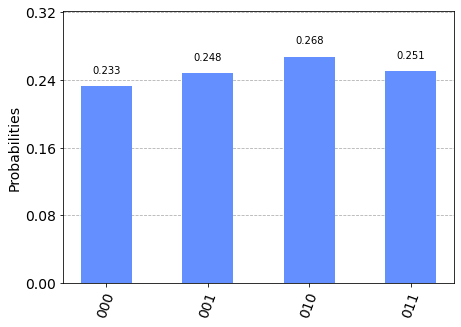

In [52]:
qc.measure(0, 0)
qc.measure(1, 1)

qc.barrier()

# 000 0
# 001 1
# 010 2
# 011 3
# 100 4
# 101 5
# 110 6
# 111 7

qc.x(2).c_if(cr, 2)
qc.z(2).c_if(cr, 4)

qc.x(2).c_if(cr, 6)
qc.z(2).c_if(cr, 6)

qc.draw()

backend = Aer.get_backend("qasm_simulator")
counts = execute(qc, backend).result().get_counts()

plot_histogram(counts)

### Send more than 1 qubit information!